In [1]:
import pandas as pd

data = pd.read_csv( 'Nationale ORCiD_NL Monitor.csv' )
data = data[ data['Selecteer je Universiteit'] != 'UMCU - Universitair Medisch Centrum Utrecht' ]

## Unique organisations
organisations = data['Selecteer je Universiteit'].unique()

def sortedByValue( dict ):      
    return sorted( dict , key=lambda x: dict[x]) 



# Ambitionist

De 'Ambitionist' is de prijs voor het hoogste aantal geregistreerde ORCIDS in het CRIS. Alle universiteiten hebben vooraf een bepaald ambitieniveau gedefinieerd, en de 'ambitionist' is de universiteit die deze ambitie het beste heeft weten te realiseren. 

De scores in deze categorie zijn berekend door de kijken naar de cijfers van het meest recente meetmoment, en door het aantal geregistreerde ORCID IDs te delen door het totaal aantal actieve onderzoekers. Dit cijfer geeft een indicatie van de total ORCID-uptake. Hoeveel procent van de onderzoekers heeft een ORCID ingevuld in het CRIS? 

In [2]:
ambitionist_scores = dict()

for o in organisations:
    data_inst = data[ data['Selecteer je Universiteit'] == o ]   
    
    # Meest recente datum
    dateMax = data_inst['Datum van meting'].max()
    mostRecent = data_inst[ data_inst['Datum van meting'] == dateMax ].squeeze()
    score = mostRecent['Aantal ORCiD registraties in het CRIS van Onderzoekers'] / mostRecent['Aantal onderzoekers']
    ambitionist_scores[o] = score
    print( f'{o}\nStand van zaken op {dateMax}:') 
    print( f"Aantal ORCID registraties: {mostRecent['Aantal ORCiD registraties in het CRIS van Onderzoekers']}\nAantal actieve onderzoekers: {mostRecent['Aantal onderzoekers']}" )
    print( f'De score komt daarmee op {score}.\n')

VU - Vrije Universiteit Amsterdam
Stand van zaken op 2020-10-15:
Aantal ORCID registraties: 1384
Aantal actieve onderzoekers: 2936
De score komt daarmee op 0.4713896457765668.

TU - Tilburg University
Stand van zaken op 2019-12-11:
Aantal ORCID registraties: 325
Aantal actieve onderzoekers: 2102
De score komt daarmee op 0.15461465271170313.

TUD - Delft University of Technology
Stand van zaken op 2020-10-06:
Aantal ORCID registraties: 2802
Aantal actieve onderzoekers: 6646
De score komt daarmee op 0.42160698164309357.

WUR - Wageningen University & Research
Stand van zaken op 2020-10-13:
Aantal ORCID registraties: 1033
Aantal actieve onderzoekers: 2004
De score komt daarmee op 0.5154690618762475.

UM - Universiteit Maastricht
Stand van zaken op 2020-10-14:
Aantal ORCID registraties: 1228
Aantal actieve onderzoekers: 5230
De score komt daarmee op 0.23479923518164436.

UT - University of Twente
Stand van zaken op 2020-10-12:
Aantal ORCID registraties: 595
Aantal actieve onderzoekers: 324

De hoogste score is behaald door de **Universiteit Leiden**. Van de 2654 onderzoekers hebben uiteindelijk 2273 een ORCID ingevoerd in het CRIS. Het uptake-percentage is daarmee 85.6 %.

De volledige lijst van de behaalde scores is hieronder te bekijken.

In [3]:
for ub in reversed( sortedByValue( ambitionist_scores) ):
    print( f'{ub}: { ambitionist_scores[ub]  } ' )

UL - Universiteit Leiden: 0.8564431047475509 
WUR - Wageningen University & Research: 0.5154690618762475 
VU - Vrije Universiteit Amsterdam: 0.4713896457765668 
RUG - Rijksuniversiteit Groningen: 0.45141903171953257 
TUD - Delft University of Technology: 0.42160698164309357 
TUE - Technische Universiteit Eindhoven: 0.3907208588957055 
TiU - Tilburg University: 0.2857817666509211 
UM - Universiteit Maastricht: 0.23479923518164436 
OU - Open Universiteit: 0.22276029055690072 
UT - University of Twente: 0.183585313174946 
TU - Tilburg University: 0.15461465271170313 
KNAW - Koninklijke Nederlandse Academie der Wetenschappen: 0.1352112676056338 
UvA - Universiteit van Amsterdam: 0.06433990895295903 
UU - Universiteit Utrecht: 0.050029429075927015 


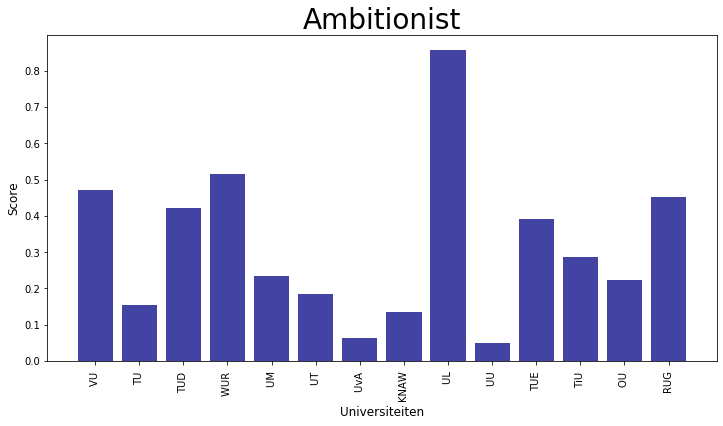

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt

x_labels = []
for x in ambitionist_scores.keys():
    x_labels.append( x[ 0 : x.index('-')] )

fig = plt.figure( figsize=(12,6) )
ax = plt.axes()

ax.bar( x_labels , ambitionist_scores.values() , color = '#4343a3')

plt.xticks(rotation= 90)

ax.set_xlabel('Universiteiten' , fontsize= 12)
ax.set_ylabel('Score' , fontsize = 12 )
ax.set_title( 'Ambitionist' , fontsize=28 )

plt.show()


# Connector


De 'Connector' is de prijs voor het grootste percentage koppelingen tussen het CRIS van een universiteit en de ORCID database. Wanneer dit soort koppelingen tot stand zijn gebracht kunnen er gegevens worden geëxporteerd vanuit het CRIS naar de ORCID-records van onderzoekers, en in sommige gevallen ook vice versa. Onderzoekers moeten deze koppelingen zelf activeren. Bibliotheken kunnen dit niet doen namens hn onderzoekers. Wanneer er in ORCID-campagnes ook acties zijn uitgevoerd om onderzoekers te bewegen om deze koppeingen tot stand te brengen, naast alleen het registreren van de ORCIDs, dan verdient dit een extra beloning. Met een actieve ORCiD-koppeling kunnen onderzoekers uiteindelijk ook veel meer. Via dit soort koppelingen kan uiteindelijk de meerwaarde van ORCID worden aangetoond. 

De scores voor deze prijs zijn berekend door het aantal koppelingen in de meest recente meting te delen door het aantal ORCID ids in het CRIS systeem. 



In [5]:
connector_scores = dict()


for o in organisations:
    data_inst = data[ data['Selecteer je Universiteit'] == o ]  
    
    ## Meest recente meting
    dateMax = data_inst['Datum van meting'].max()
    mostRecent = data_inst[ data_inst['Datum van meting'] == dateMax ].squeeze()
    
    score = mostRecent['Aantal ORCiD Export Koppelingen in het CRIS van Onderzoekers'] / mostRecent['Aantal ORCiD registraties in het CRIS van Onderzoekers']
    
    ## Incorrecte resultaten (bijv delingen door 0) worden genegeerd
    if( not( pd.isnull(score) ) ):
        connector_scores[o] = float(score)

        print( f'{o}\nStand van zaken op {dateMax}:') 
        print( f"Aantal ORCiD Export Koppelingen in CRIS: { int(mostRecent['Aantal ORCiD Export Koppelingen in het CRIS van Onderzoekers']) }\nAantal onderzoekers: {mostRecent['Aantal onderzoekers']}" )
        print( f'De score komt daarmee op {score}.\n')
    
        

VU - Vrije Universiteit Amsterdam
Stand van zaken op 2020-10-15:
Aantal ORCiD Export Koppelingen in CRIS: 1206
Aantal onderzoekers: 2936
De score komt daarmee op 0.8713872832369942.

TUD - Delft University of Technology
Stand van zaken op 2020-10-06:
Aantal ORCiD Export Koppelingen in CRIS: 636
Aantal onderzoekers: 6646
De score komt daarmee op 0.22698072805139186.

WUR - Wageningen University & Research
Stand van zaken op 2020-10-13:
Aantal ORCiD Export Koppelingen in CRIS: 115
Aantal onderzoekers: 2004
De score komt daarmee op 0.11132623426911907.

UM - Universiteit Maastricht
Stand van zaken op 2020-10-14:
Aantal ORCiD Export Koppelingen in CRIS: 343
Aantal onderzoekers: 5230
De score komt daarmee op 0.27931596091205213.

UT - University of Twente
Stand van zaken op 2020-10-12:
Aantal ORCiD Export Koppelingen in CRIS: 147
Aantal onderzoekers: 3241
De score komt daarmee op 0.24705882352941178.

UvA - Universiteit van Amsterdam
Stand van zaken op 2020-10-15:
Aantal ORCiD Export Koppel

Wanneer we de universiteiten rangschikken aan de hand van deze scores staat de UL wederom bovenaan. Omdat universiteiten maar een prijs in één categorie kunnen winnen, gaat de trofee in dit geval naar nummer twee van de lijst, en dat is de **Vrije Universiteit Amsterdam**. Op het laatste peilmoment, 15 oktober 2020, hadden 1206 van de 2036 onderoekers een koppeling tot stand gebracht met de ORCID-database. Dit komt neer op 41% van alle actieve onderzoekers. 

In [6]:
def sortedByValue( dict ):      
    return sorted( dict , key=lambda x: dict[x]) 

for ub in reversed( sortedByValue(connector_scores) ):
    print( f'{ub}: { connector_scores[ub]  } ' )
    

VU - Vrije Universiteit Amsterdam: 0.8713872832369942 
UvA - Universiteit van Amsterdam: 0.7547169811320755 
TiU - Tilburg University: 0.7355371900826446 
UL - Universiteit Leiden: 0.6480422349318082 
UU - Universiteit Utrecht: 0.5735294117647058 
RUG - Rijksuniversiteit Groningen: 0.34541420118343197 
UM - Universiteit Maastricht: 0.27931596091205213 
UT - University of Twente: 0.24705882352941178 
TUE - Technische Universiteit Eindhoven: 0.23454367026496564 
TUD - Delft University of Technology: 0.22698072805139186 
OU - Open Universiteit: 0.21739130434782608 
KNAW - Koninklijke Nederlandse Academie der Wetenschappen: 0.1527777777777778 
WUR - Wageningen University & Research: 0.11132623426911907 


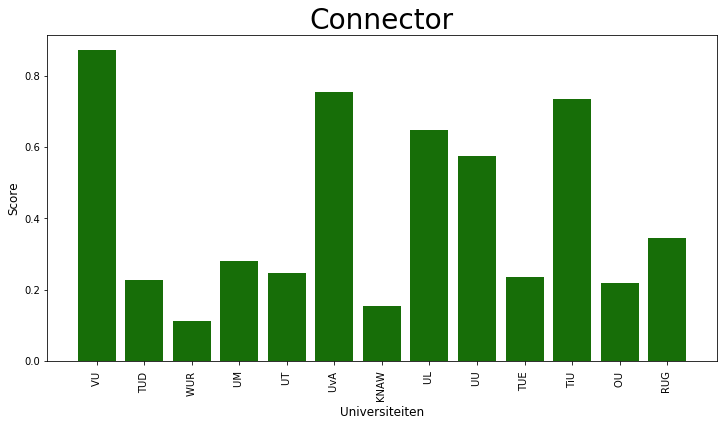

In [7]:


fig = plt.figure( figsize=(12,6) )
ax = plt.axes()

x_labels = []
for x in connector_scores.keys():
    x_labels.append( x[ 0 : x.index('-')] )

ax.bar(  x_labels , connector_scores.values() , color = '#176e08')

plt.xticks(rotation= 90)

ax.set_xlabel('Universiteiten' , fontsize= 12)
ax.set_ylabel('Score' , fontsize = 12 )
ax.set_title( 'Connector' , fontsize=28 )

plt.show()

## Bloomer

De 'bloomer' beloont de universiteit waar de sterkste groei is geweest vanaf de startpositie. Welke uptake percentage had de universiteit aan het begin van de ORCID-campage, en welk percentage is er *uiteindelijk* bereikt? Welke universiteit heeft de meeste progressie laten zien?

De scores in deze categorie zijn berekend door, kijkend naar alle metingen, het laagste aantal ORCIDs en het hoogste aantal ORCIDs te bepalen. Hierbij is er vanuit gegaan dat er alleen maar een groei kan zijn, en dat het laagste aantal ORCIDs inderdaad ook de uitgangspositie is. Beide aantallen zijn gedeeld door het aantal onderoekers, zoals geregistreerd op die tijdstippen. De uiteindelijke score is het verschil tussen deze twee uptake-percentages.  

In [8]:
bloomer_scores = dict()

for o in organisations:
    
    ## Uitgangspositie van 0 wordt verwijderd
    data_inst = data[ data['Selecteer je Universiteit'] == o ] 
    
    data_inst = data_inst[ data_inst['Aantal ORCiD registraties in het CRIS van Onderzoekers'] > 0 ] 
    sorted_df = data_inst.sort_values(by=['Aantal ORCiD registraties in het CRIS van Onderzoekers'], ascending=False)
    
    highest = sorted_df.iloc[0]
    lowest = sorted_df.iloc[-1]
  
    lowest_perc = lowest['Aantal ORCiD registraties in het CRIS van Onderzoekers'] / lowest['Aantal onderzoekers']
    highest_perc = highest['Aantal ORCiD registraties in het CRIS van Onderzoekers'] / highest['Aantal onderzoekers']
    
    bloomer_scores[o] = ( highest_perc - lowest_perc ) 
    
    print( f'{o}' )
    print( f'Uptake-percentage bij begin campagne: {lowest_perc}' )
    print( f'Uptake-percentage bij eind campagne: {highest_perc}' )
    print( f'Dit is een groei van { bloomer_scores[o] * 100 } procent.\n' )
    
    

    
    

VU - Vrije Universiteit Amsterdam
Uptake-percentage bij begin campagne: 0.20725009154155988
Uptake-percentage bij eind campagne: 0.4713896457765668
Dit is een groei van 26.41395542350069 procent.

TU - Tilburg University
Uptake-percentage bij begin campagne: 0.15461465271170313
Uptake-percentage bij eind campagne: 0.25
Dit is een groei van 9.538534728829687 procent.

TUD - Delft University of Technology
Uptake-percentage bij begin campagne: 0.06277695716395865
Uptake-percentage bij eind campagne: 0.43913109066224165
Dit is een groei van 37.6354133498283 procent.

WUR - Wageningen University & Research
Uptake-percentage bij begin campagne: 0.04723991507430998
Uptake-percentage bij eind campagne: 0.5154690618762475
Dit is een groei van 46.822914680193755 procent.

UM - Universiteit Maastricht
Uptake-percentage bij begin campagne: 0.04534448602245213
Uptake-percentage bij eind campagne: 0.2364229514488582
Dit is een groei van 19.107846542640605 procent.

UT - University of Twente
Uptake-p

Wanneer de score worden gerangschikt wordt duidelijk dat **Wageningen University & Research** de grootse groei heeft doorgemaakt. Het uptake-percentage was 4.7% bij de start van de campagne. In oktober 2020 was er een uptake-percentage van 51.5%. Dit komt neer op een groei van 46.8%. 

Opvallend is overigens wel dat er bij het UMC-U een afname lijkt te zijn, aar dit is waarschijnlijk een foutieve invoer. 

In [9]:
for ub in reversed( sortedByValue(bloomer_scores) ):
    print( f'{ub}: { round( bloomer_scores[ub] , 3 ) }' )
    

WUR - Wageningen University & Research: 0.468
TUD - Delft University of Technology: 0.376
OU - Open Universiteit: 0.32
VU - Vrije Universiteit Amsterdam: 0.264
UM - Universiteit Maastricht: 0.191
TiU - Tilburg University: 0.172
TU - Tilburg University: 0.095
RUG - Rijksuniversiteit Groningen: 0.075
TUE - Technische Universiteit Eindhoven: 0.051
KNAW - Koninklijke Nederlandse Academie der Wetenschappen: 0.038
UvA - Universiteit van Amsterdam: 0.034
UL - Universiteit Leiden: 0.033
UT - University of Twente: 0.026
UU - Universiteit Utrecht: 0.018


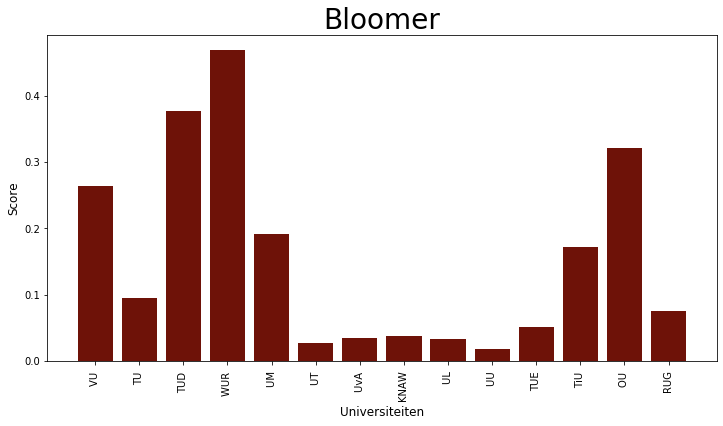

In [10]:
fig = plt.figure( figsize=(12,6) )
ax = plt.axes()

x_labels = []
for x in bloomer_scores.keys():
    x_labels.append( x[ 0 : x.index('-')] )

ax.bar( x_labels , bloomer_scores.values() , color = '#6e1208')

plt.xticks(rotation= 90)

ax.set_xlabel('Universiteiten' , fontsize= 12)
ax.set_ylabel('Score' , fontsize = 12 )
ax.set_title( 'Bloomer' , fontsize=28 )

plt.show()

# Pioneer

De toename in het aantal ORCIDs kan worden gevolgd door te kijken naa het aantal ORCIDs dat is ingevuld in het CRIS te delen door het totaal aantal actieve onderzoekers. Dit laatste getal kan bijvoorbeeld worden vastgesteld op basis van de gegevens van de P&O afdeling van de universiteit. Dit cijfer zegt niet noodzakelijk iets over het daadwerkelijke aantal ORCIDs. Er zijn namelijk ook onderzoekers die wel al een ORCID hebben, maar deze nog niet hebben geregistreerd in het CRIS. Sommige universiteiten hebben ook geprobeerd om deze groep in kaart te brengen, door direct in de ORCID database te zoeken via de ORCIS 'Name Search' API. De onderzoekers in deze laatste groep konden dan binnen de campagne een meer gericht verzoek krijgen om hun bestaande ORCID te registreren. 

De 'Pioneer' trofee gaat naar de instelling die de meeste onderzoekers heeft opgespoord in de ORCID-database. De scores zijn berekend door het aantal bij ORCID gevonden onderzoekers te delen door het totaal aantal onderzoekers (zoals vastgelegd in het eigen P&O systeem of in LUCRIS).

Niet alle universiteiten hebben deze cijfers verzameld. De universiteiten die geen cijfers hebben aangeleverd over het aantal onderzoekers in de ORCID-database zijn uiteraard buiten beschouwing gelaten. 

De scores staan hieronder:

In [11]:
pioneer_scores = dict()


for o in organisations:
    data_inst = data[ data['Selecteer je Universiteit'] == o ]  
    
    ## Meest recente meting
    dateMax = data_inst['Datum van meting'].max()
    mostRecent = data_inst[ data_inst['Datum van meting'] == dateMax ].squeeze()
    if( not( pd.isnull(mostRecent['Aantal Onderzoekers in de ORCiD database']) ) ) and mostRecent['Aantal Onderzoekers in de ORCiD database'] > 0:
        score = mostRecent['Aantal Onderzoekers in de ORCiD database'] / mostRecent['Aantal onderzoekers'] 
        pioneer_scores[o] = score
        
        print(f'{o}:')
        print(f"Stand van zaken op { mostRecent['Datum van meting']}:")
        print(f"Aantal onderzoekers: { mostRecent['Aantal onderzoekers']}")
        print(f"Aantal ondezoekers in ORCID database: { mostRecent['Aantal Onderzoekers in de ORCiD database']}")
        print(f"Score: { score }\n")

    

TUD - Delft University of Technology:
Stand van zaken op 2020-10-06:
Aantal onderzoekers: 6646
Aantal ondezoekers in ORCID database: 3885.0
Score: 0.5845621426421908

UvA - Universiteit van Amsterdam:
Stand van zaken op 2020-10-15:
Aantal onderzoekers: 6590
Aantal ondezoekers in ORCID database: 3834.0
Score: 0.5817905918057663

UL - Universiteit Leiden:
Stand van zaken op 2020-09-01:
Aantal onderzoekers: 2654
Aantal ondezoekers in ORCID database: 2386.0
Score: 0.8990203466465713

UU - Universiteit Utrecht:
Stand van zaken op 2020-10-14:
Aantal onderzoekers: 6796
Aantal ondezoekers in ORCID database: 3387.0
Score: 0.4983814008240141

OU - Open Universiteit:
Stand van zaken op 2020-12-06:
Aantal onderzoekers: 413
Aantal ondezoekers in ORCID database: 207.0
Score: 0.5012106537530266



De Universiteit Leiden heeft al een prijs ontvangen in de categorie 'Ambitionist'. De trofee gaat daarom naar de tweede universiteit op de lijst, **Delft University of Technology**. 3885 van 6646 Delftse onderzoekers zijn getraceerd in de ORCID-database. Dat is een percentage van 58%. 

In [12]:
for ub in reversed( sortedByValue(pioneer_scores) ):

    print( f'{ub}: { round( pioneer_scores[ub] , 3 ) }' )

UL - Universiteit Leiden: 0.899
TUD - Delft University of Technology: 0.585
UvA - Universiteit van Amsterdam: 0.582
OU - Open Universiteit: 0.501
UU - Universiteit Utrecht: 0.498


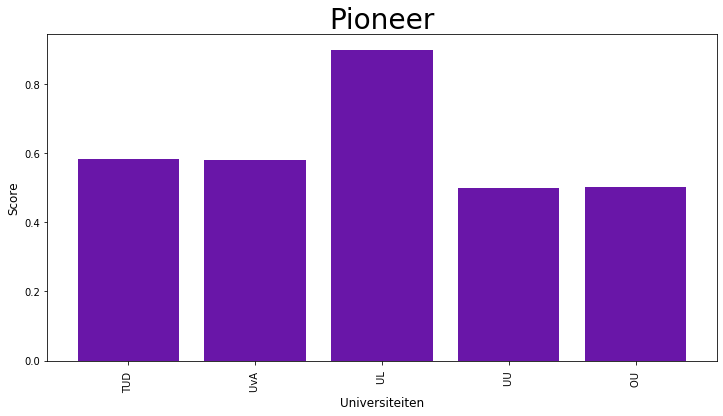

In [13]:
fig = plt.figure( figsize=(12,6) )
ax = plt.axes()

x_labels = []
for x in pioneer_scores.keys():
    x_labels.append( x[ 0 : x.index('-')] )

ax.bar( x_labels , pioneer_scores.values() , color = '#6916a8')

plt.xticks(rotation= 90)

ax.set_xlabel('Universiteiten' , fontsize= 12)
ax.set_ylabel('Score' , fontsize = 12 )
ax.set_title( 'Pioneer' , fontsize=28 )

plt.show()

## Story Teller

Deze prijs wordt toegekend aan het campagneteam dat echt in gesprek is gegaan met onderzoekers. In sommige gevallen hebben campagneteams echt een persoonlijke band of een bijzondere relatie opgebouwd met onderzoekers. Tijdens dit soort persoonlijke interacties met odnerzoekers onstaan vaak bijzondere verhalen en mooie anekdotes. Deze trofe wordt dan ook toegekend aan de universiteit die de meest grappige, sappige, ontroerendste ORCiD-wervingsverhalen wist te vertellen. De prijswinnaar wordt niet op kwantitieve gronden bepaald, maar is gekozen door een onafhankelijke jury die alle ingezonden verhaen op een kwalitatieve basis heeft beoordeeld. 

Hieronder het

We hebben genoten van de enthousiaste en originele acties van de verschillende campagnes binnen de instellingen. Zo werd het ons eens te meer duidelijk dat ORCiD een belangrijk element kan zijn in het ontzorgen van onderzoekers op administratief vlak. Van studenten die op pad gestuurd werden als ORCiD promoters en ondersteuners, maar ook dienden als welkome uitlaatklep voor administratief overladen onderzoekers tot constructieve gesprekken tussen onderzoekers en onderzoeksondersteuners. De verhalen gaven een prachtig inkijkje in de campagne keukens. Van de inzendingen sprong die van de UU eruit met betrekkking tot de combinatie van functionaliteit en creativiteit.
Door workhsops over zichtbaarheid te koppelen aan een ORCiD loterij combineerde de UU het nuttige met humoristische. Kudo’s voor het enthousiasme en de uitvoer en bij deze dan ook de winnaar van de Story prijs…



## Rode lantaarn

Dit is een aanmoedigingsprijs, waarmee we de universiteit met de laagste scores binnen de verschillende categorieën willen aanmoedigen om hun campagne meer kracht bij te zetten. 

De scores in deze categorie zijn berekend door de scores in de ambitionist, de connector, de pioneer en de bloomer bi elkaar op te tellen. De prijs gaat naar de universiteit met de laagste score in al deze categorieën.

In [14]:
## Berekening rode lantaarn

red_lantern = dict()

for ub in organisations:
    
    a = ambitionist_scores.get( ub , 0 )
    c = connector_scores.get( ub , 0 )
    b = bloomer_scores.get( ub , 0 )
    p = pioneer_scores.get( ub , 0 )
    totaal = a+b+c+p    
    red_lantern[ub] = totaal
    
    print( f'{ub}\nScore: {red_lantern[ub]}\n' )



VU - Vrije Universiteit Amsterdam
Score: 1.6069164832485678

TU - Tilburg University
Score: 0.25

TUD - Delft University of Technology
Score: 1.6095039858349591

WUR - Wageningen University & Research
Score: 1.0950244429473042

UM - Universiteit Maastricht
Score: 0.7051936615201025

UT - University of Twente
Score: 0.45701713221317736

UvA - Universiteit van Amsterdam
Score: 1.4346884146609815

KNAW - Koninklijke Nederlandse Academie der Wetenschappen
Score: 0.3260040513068024

UL - Universiteit Leiden
Score: 2.4364964018150608

UU - Universiteit Utrecht
Score: 1.1402015008970903

TUE - Technische Universiteit Eindhoven
Score: 0.6759189060962281

TiU - Tilburg University
Score: 1.1937312563564833

OU - Open Universiteit
Score: 1.2618025002300803

RUG - Rijksuniversiteit Groningen
Score: 0.8719456845707609



**Tilburg University** heeft het laagste gescoord. 

In [15]:
for ub in sortedByValue(red_lantern):
    print( f'{ub} {red_lantern[ub]} ')
        

TU - Tilburg University 0.25 
KNAW - Koninklijke Nederlandse Academie der Wetenschappen 0.3260040513068024 
UT - University of Twente 0.45701713221317736 
TUE - Technische Universiteit Eindhoven 0.6759189060962281 
UM - Universiteit Maastricht 0.7051936615201025 
RUG - Rijksuniversiteit Groningen 0.8719456845707609 
WUR - Wageningen University & Research 1.0950244429473042 
UU - Universiteit Utrecht 1.1402015008970903 
TiU - Tilburg University 1.1937312563564833 
OU - Open Universiteit 1.2618025002300803 
UvA - Universiteit van Amsterdam 1.4346884146609815 
VU - Vrije Universiteit Amsterdam 1.6069164832485678 
TUD - Delft University of Technology 1.6095039858349591 
UL - Universiteit Leiden 2.4364964018150608 


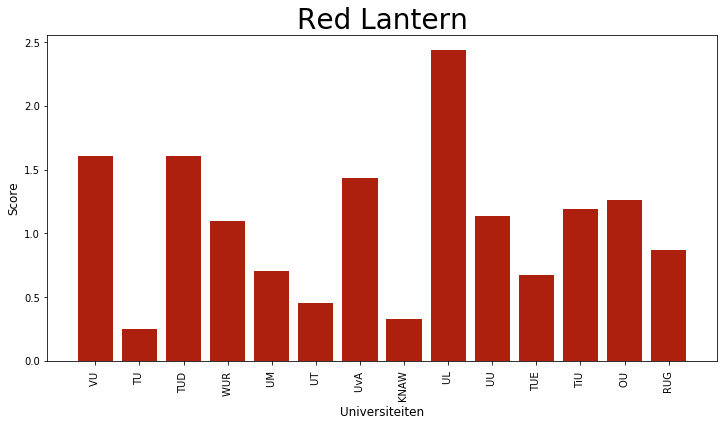

In [16]:
fig = plt.figure( figsize=(12,6) )
ax = plt.axes()

x_labels = []
for x in red_lantern.keys():
    x_labels.append( x[ 0 : x.index('-')] )

ax.bar( x_labels , red_lantern.values() , color = '#ad200e')

plt.xticks(rotation= 90)

ax.set_xlabel('Universiteiten' , fontsize= 12)
ax.set_ylabel('Score' , fontsize = 12 )
ax.set_title( 'Red Lantern' , fontsize=28 )

plt.show()

In [17]:


afterCampaign = 0 
beforeCampaign = 0 
afterResearchers = 0 
beforeResearchers = 0 
connectionsBefore = 0 
connectionsAfter = 0 

for o in organisations:
    data_inst = data[ data['Selecteer je Universiteit'] == o ]
        
    data_inst = data_inst[ data_inst['Aantal ORCiD registraties in het CRIS van Onderzoekers'] > 0 ] 
    sorted_df = data_inst.sort_values(by=['Aantal ORCiD registraties in het CRIS van Onderzoekers'], ascending=False)
    
    finalResult = sorted_df.iloc[0] 
    startPosition = sorted_df.iloc[-1] 
    
    afterCampaign += finalResult['Aantal ORCiD registraties in het CRIS van Onderzoekers']
    beforeCampaign += startPosition['Aantal ORCiD registraties in het CRIS van Onderzoekers']
    afterResearchers += finalResult['Aantal onderzoekers']
    beforeResearchers  += startPosition['Aantal onderzoekers']
    
    if( not( pd.isnull(finalResult['Aantal ORCiD Export Koppelingen in het CRIS van Onderzoekers']) ) ):
        connectionsAfter += finalResult['Aantal ORCiD Export Koppelingen in het CRIS van Onderzoekers']
    if( not( pd.isnull(startPosition['Aantal ORCiD Export Koppelingen in het CRIS van Onderzoekers']) ) ):
        connectionsBefore += startPosition['Aantal ORCiD Export Koppelingen in het CRIS van Onderzoekers']


print ( f'Aantal ORCIDs bij de start van de campagne: { beforeCampaign }')
print ( f'Totaal aantal onderzoekers: { beforeResearchers }' )
print ( f'Aantal koppelingen vanuit CRIS naar ORCID: { int( connectionsBefore) }' )
print ( f'Percentage: { beforeCampaign / beforeResearchers }' )

print ( f'\nAantal ORCIDs na de campagne: { afterCampaign}' )
print ( f'Totaal aantal onderzoekers: { afterResearchers }' )
print ( f'Aantal koppelingen vanuit CRIS naar ORCID: { int( connectionsAfter) }' )
print ( f'Percentage: { afterCampaign / afterResearchers }' )

    

Aantal ORCIDs bij de start van de campagne: 6977
Totaal aantal onderzoekers: 50776
Aantal koppelingen vanuit CRIS naar ORCID: 1540
Percentage: 0.137407436584213

Aantal ORCIDs na de campagne: 14463
Totaal aantal onderzoekers: 50811
Aantal koppelingen vanuit CRIS naar ORCID: 4795
Percentage: 0.284643089094881
